In [13]:
import torch.nn as nn
import torch
from torchvision import models
import torch.nn.functional as F
from torch.autograd import Variable
import time
import scipy.io as scio
import cv2
import numpy as np

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 400)
        self.celu = nn.CELU()
        self.fc2 = nn.Linear(400, 400)
        self.fc3 = nn.Linear(400, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.celu(x)
        x = self.fc2(x)
        x = self.celu(x)
        output = self.fc3(x)
        return output

60000
Epoch:  1 , Training Loss: 0.32782497036270797
Test Accuracy: 93 %  Test Loss: 0.21056015242822468
60000
Epoch:  2 , Training Loss: 0.1576193869439885
Test Accuracy: 95 %  Test Loss: 0.14324959335499443
60000
Epoch:  3 , Training Loss: 0.1079499827833691
Test Accuracy: 95 %  Test Loss: 0.1311026453319937
60000
Epoch:  4 , Training Loss: 0.08061888539523351
Test Accuracy: 96 %  Test Loss: 0.1250282868335489
60000
Epoch:  5 , Training Loss: 0.06148384754516883
Test Accuracy: 96 %  Test Loss: 0.10974213382913149
60000
Epoch:  6 , Training Loss: 0.04960700043971883
Test Accuracy: 97 %  Test Loss: 0.10142988713554586
60000
Epoch:  7 , Training Loss: 0.04032762466721276
Test Accuracy: 97 %  Test Loss: 0.09229515114852802
60000
Epoch:  8 , Training Loss: 0.035674013172708026
Test Accuracy: 96 %  Test Loss: 0.1303368112419412
60000
Epoch:  9 , Training Loss: 0.030070527522620977
Test Accuracy: 97 %  Test Loss: 0.11629405542382301
60000
Epoch:  10 , Training Loss: 0.030630547320385327
Tes

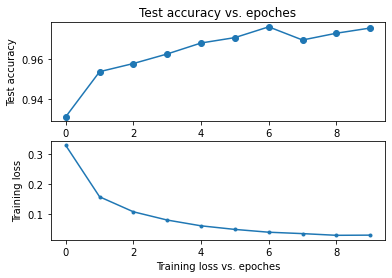

In [14]:
import sys
import numpy as np
import torch
import torch.nn as nn
import os
import torch.nn.functional as functional
import scipy.io as scio
import cv2
import time
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

num_workers = 0
batch_size = 100
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                            download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                           download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)

# model construct
model = MLP()
# specify loss function
criterion = nn.CrossEntropyLoss()
# specify optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

n_epochs = 10
best_acc = 0
Loss_list = []
Accuracy_list = []

for epoch in range(n_epochs):
    train_loss = 0.0
    for train_data, train_gt in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(train_data)
        # calculate the loss
        loss = criterion(output, train_gt)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        train_loss += loss.item() * train_data.size(0)
    print(len(train_loader.dataset))
    train_loss = train_loss / len(train_loader.dataset)
    Loss_list.append(train_loss)
    print('Epoch:  {} , Training Loss: {}'.format(epoch + 1, train_loss))

    # eval
    model.eval()  # prep model for evaluation
    test_loss = 0.0
    class_correct = 0
    class_total = 0
    # test process does not require back propagation
    with torch.no_grad():
        for test_data, test_gt in test_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(test_data)
            # calculate the loss
            loss = criterion(output, test_gt)
            # update test loss
            test_loss += loss.item() * test_data.size(0)
            # convert output probabilities to predicted class
            _, predicted = torch.max(output.data, 1)
            class_total += test_gt.size(0)
            class_correct += (predicted == test_gt).sum().item()
    # calculate and print avg test loss
    test_loss = test_loss / len(test_loader.dataset)
    #save best model
    if class_correct / class_total > best_acc:
        best_model_name = '%d %%' % (
                100 * class_correct / class_total) + '_acc_Epoch_' + str(epoch) + '.pth'
        torch.save(model.state_dict(), best_model_name)
        best_acc = class_correct / class_total
    Accuracy_list.append(class_correct / class_total)
    print('Test Accuracy: %d %%' % (
            100 * class_correct / class_total) + "  Test Loss: " + str(test_loss))

# draw training loss figure and accuracy figure
x1 = range(0, 10)
x2 = range(0, 10)
y1 = Accuracy_list
y2 = Loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Test accuracy vs. epoches')
plt.ylabel('Test accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('Training loss vs. epoches')
plt.ylabel('Training loss')
plt.show()

In [12]:
import sys
import numpy as np
import torch
import torch.nn as nn
import os
import torch.nn.functional as functional
import scipy.io as scio
import cv2
import time
from torchvision import datasets
import torchvision.transforms as transforms

num_workers = 0
batch_size = 100
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

test_data = datasets.MNIST(root='data', train=False,
                           download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers)


model = MLP()
model.load_state_dict(torch.load("97 %_acc_Epoch_9.pth"))  # change to the path of your model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# test
test_loss = 0.0
class_correct = 0
class_total = 0
# test process does not require back propagation
with torch.no_grad():
    for test_data, test_gt in test_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(test_data)
        # calculate the loss
        loss = criterion(output, test_gt)
        # update test loss
        test_loss += loss.item() * test_data.size(0)
        # convert output probabilities to predicted class
        _, predicted = torch.max(output.data, 1)
        # print(output.data)
        class_total += test_gt.size(0)
        class_correct += (predicted == test_gt).sum().item()
    print('Test Accuracy: %d %%' % (
            100 * class_correct / class_total))


Test Accuracy: 97 %
